## 임베딩 Embedding (자연어처리)

- 임베딩: 자연어를 숫자나 벡터 형태로 변환하는 과정
- 말뭉치의 의미에 따라 벡터화하기 때문에 문법적인 정보가 포함되어 있음
- 임베딩의 품질이 좋으면 단순한 모델로도 홀륭한 결과를 얻을 가능성이 높음
- 딥러닝 모델의 입력값으로 많이 사용됨
 

#### 분류
- 문장 임베딩 : 문장 전체를 벡터로 표현하는 방법
    - 장점: 문맥적 의미를 지님, 단어 임베딩에 비해 품질이 좋으며, 상용시스템에 많이 사용됨
    - 단점: 많은 문장 데이터가 필요, 학습에 비용이 과다소요
<br>

- 단어 임베딩 : 개별 단어를 벡터로 표현하는 방법
    - 장점: 학습방법이 간단해 실무에서 많이 사용
    - 단점: 동음이의어에 대한 구분을 하지 않기 때문에 의미가 다르더라도 단어의 형태가 같다면 동일한 벡터값으로 표현됨


### 4.2 단어임베딩
- 말뭉치에서 각각의 단어를 벡터로 변환하는 기법
- 의미와 문법적 정보를지니고 있음
- 단어를 표현하는 방법에 따라 다양한 모델이 존재
- vs 토큰: 형태소 기반

#### 4.2.1 원-핫 인코딩 One-hot Encoding
- 요소들 중 단 하나의 값만 1이고 나머지 요솟값은 0인 인코딩을 의미
- 원-핫 인코딩으로 나온 결과를 원-핫 벡터라 함
- 전체 요소 중 단 하나의 값만 1이기 때문에 희소벡터 라고 함

In [1]:
from konlpy.tag import Komoran
import numpy as np

komoran = Komoran()
# text = '오늘 날씨는 구름이 많아요.'
text = '오늘 날씨는 구름과 우주인이 많아요.'

# 명사만 추출
nouns = komoran.nouns(text)

# 단어사전 구축 및 단어별 인덱스 부여
dics = {}
for word in nouns:
    if word not in dics.keys():   # key: value로 저장되므로 중복 없음
        dics[word] = len(dics)

# 원핫 인코딩
nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye(nb_classes)[targets]

print(nouns)
print()
print(dics)
print()
print(one_hot_targets)

['오늘', '날씨', '구름', '우주인']

{'오늘': 0, '날씨': 1, '구름': 2, '우주인': 3}

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [2]:
nb_classes

4

In [3]:
np.eye(nb_classes)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [4]:
targets

[0, 1, 2, 3]

In [5]:
np.eye(nb_classes)[targets]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

np.identity(n)

    - n: n X n 정방단위행렬
    - 대각원소가 1이고 나머지 모두 0

np.eye(n, k=m, dtype = int)

    - n: n X n 행렬을 나타냄
    - k: 정방단위행렬 기준, 어느 부분에 대각행렬을 나타낼지
        - k = 1: 대각원소 사선 윗방향으로 표시
        - k = -1: 대각원소 사선 아랫방향으로 표시


#### 4.2.2 희소행렬과 분산 표현(밀집 표현)

- 희소표현: 단어가 희소 벡터로 표현되는 방식
    - 장점: 각각의 차원이 독립적인 정보를 지니고 있어 사람이 이해하기에 직관적
    - 단점: 단어 사전의 크기가 커질수록 메모리 낭비와 계산 복잡도가 커짐(입력 데이터의 차원이 너무 높아지면 학습이 어려워지는 차원의 저주 문제가 발생), 단어 간의 연관성이 전혀 없어 의미를 담을 수 없음

<br>

- 분산표현: 한 단어의 정보가 특정 차원에 표현되지 않고 여러 차원에 분산되어 표현됨. 하나의 차원에 다양한 정보를 갖고 있음
    - 장점: 각 단어 간의 유사성을 잘 표현하면서도 벡터 공간을 절약할 수 있음. (데이터 손실 최소화하면서 압축)
    - 단점: 직관적이지 않음(신경망 모델에서의 분산 표현은 사람이 직관적으로 알 수 없는 형태의 수치로 표현됨)
    - 이해하기 위한 예시) 색상 RGB 모델, 3차원 벡터로 표현 
        - 연두색 RGB를 (204,255,204) 형태로 분산 표현

#### 4.2.3 Word2Vec

- Word to Vector. 단어를 벡터값으로 변환

- CBOW 모델: 주변 단어들로부터 중간 단어를 예측
    - 맥락이라 표현되는 주변 단어를 이용해 타깃 단어를 예측하는 신경망 모델
    - 학습 속도가 빠름
    - window: 앞뒤 확인하는 단어의 범위 >>> 이 범위에 따라서 결과도 달라짐
    <br>
    
- skip-gram모델: 중간 단어들로부터 주변 단어를 예측
    - 하나의 타깃 단어를 이용해 주변 단어들을 예측하는 신경망 모델
    - 예측해야 하는 맥락이 많아짐
    - 분산 표현력이 우수, CBOW에 비해 임베딩 품질이 우수
    
- 의미상 비슷한 단어를 비슷한 벡터 공간에 위치시킴. 의미에 따라 방향성도 가짐
    - ex) 왕/여왕의 방향차이만큼, 남자/여자의 방향차이가 생김
- Gensim 패키지 사용: 토픽모델링, 자연어처리 위한 라이브러리


In [ ]:
from gensim.models import Word2Vec
from konlpy.tag import Komoran
import time

# naver movie review data
def read_rv_data(filename):
    with open(filename, 'r', encoding = 'utf-8') as f:        # 인코딩값 확인
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]  # 헤더 제거
    return data

# 학습시간 측정 시작
start = time.time()

# file reading
print('1. 말뭉치 데이터 읽기 시작')
rv_data = read_rv_data('Data/230620/ratings.txt')
print(len(rv_data))
print('1. 말뭉치 데이터 읽기 완료: ', time.time() - start)

# 문장단위 명사 추출 
print('2. 형태소에서 명사만 추출 시작')
komoran = Komoran()
docs = [komoran.nouns(sentence[1]) for sentence in rv_data]    # sentence[1] : document 컬럼 데이터
print('2. 형태소에서 명사 추출 완료: ', time.time() - start)

# Word2Vec 모델 학습
print('3. Word2Vec 모델 학습 시작')
model = Word2Vec(sentences = docs, vector_size= 200, window = 4, hs = 1, min_count = 2, sg = 1)
# vector_size: 단어 임베딩 벡터 차원(크기)
# hs: 1 (softmax 사용), 0 (negative sampling 사용)
# min_count: 단어 최소 빈도수 제한 (min_count 이하 단어들은 학습하지 않음)
# sg: 0 (CBOW 모델), 1 (skip-gram 모델)
print('3. Word2Vec 모델 학습 완료: ', time.time() - start)

# 모델 저장
print('4. 학습된 모델 저장 시작')
model.save('nvmc.model')
print('4. 학습된 모델 저장 완료: ', time.time() - start)

# 학습된 말뭉치 수, 코퍼스 내 전체 단어 수
print('corpus_count: ', model.corpus_count)
print('corpus_total_words: ', model.corpus_total_words)


#### 예제4-2

In [11]:
from gensim.models import Word2Vec

# Model loading
model = Word2Vec.load('Data/230620/nvmc.model')
print('corpus_total_words: ', model.corpus_total_words)

# 단어 '사랑'의 임베딩 벡터
print('사랑: ', model.wv['사랑'])

# 단어 유사도
print('일요일 = 월요일\t', model.wv.similarity(w1 = '일요일', w2 = '월요일'))
print('안성기 = 배우\t', model.wv.similarity(w1 = '안성기', w2 = '배우'))
print('대기업 = 삼성\t', model.wv.similarity(w1 = '대기업', w2 = '삼성'))
print('일요일 != 삼성\t', model.wv.similarity(w1 = '일요일', w2 = '삼성'))
print('히어로 != 삼성\t', model.wv.similarity(w1 = '히어로', w2 = '삼성'))

# 가장 유사한 단어 추출
print(model.wv.most_similar('안성기', topn = 5))   # topn : 반환되는 유사한 단어 수, 5개까지 반환
print(model.wv.most_similar('시리즈', topn = 5))


corpus_total_words:  1076896
사랑:  [ 1.37054607e-01 -4.70625371e-01  2.70329982e-01  2.29139656e-01
  6.51064096e-04 -3.41579348e-01 -5.14895143e-03  1.55841440e-01
  3.98388773e-01  2.40801219e-02 -6.16622483e-03 -1.50228158e-01
  1.84940279e-01  9.45076719e-02 -1.74884379e-01  2.22967699e-01
 -1.33638665e-01 -1.21970370e-01 -1.28276482e-01 -2.35012338e-01
 -1.14881434e-01  8.19132403e-02 -3.07359755e-01 -4.88866083e-02
 -1.74749538e-01  2.70181540e-02  5.96590992e-03 -3.17530274e-01
 -1.40420869e-02 -3.65516990e-01  1.39276966e-01  2.55429503e-02
 -1.82696600e-02  4.11703102e-02  1.02565534e-01  2.39239544e-01
  1.33578420e-01 -2.12786466e-01 -1.80205107e-02 -1.64547548e-01
 -1.54921338e-01 -1.45771727e-02 -1.77153379e-01 -4.75571528e-02
  1.97120234e-01  1.66118190e-01 -3.29414904e-01 -1.27827406e-01
  2.50631273e-01  2.43996263e-01  8.54840726e-02 -8.57592300e-02
 -3.14066976e-01 -4.82293256e-02  3.56313474e-02  1.38197914e-01
  3.60876709e-01 -2.20218748e-01  5.64148724e-02 -5.1762

In [14]:
# 단어 '사랑'의 임베딩 벡터
print('사랑: ', model.wv.most_similar(positive= ['사랑']))

# 단어 유사도
print('일요일 = 월요일\t', model.wv.similarity(w1 = '일요일', w2 = '월요일'))
print('안성기 = 배우\t', model.wv.similarity(w1 = '안성기', w2 = '배우'))
print('대기업 = 삼성\t', model.wv.similarity(w1 = '대기업', w2 = '삼성'))
print('일요일 != 삼성\t', model.wv.similarity(w1 = '일요일', w2 = '삼성'))
print('히어로 != 삼성\t', model.wv.similarity(w1 = '히어로', w2 = '삼성'))

# 가장 유사한 단어 추출
print(model.wv.most_similar('안성기', topn = 5))   # topn : 반환되는 유사한 단어 수, 5개까지 반환
print(model.wv.most_similar('시리즈', topn = 5))


사랑:  [('사랑하니까', 0.6781434416770935), ('아가페', 0.6568448543548584), ('사랑은', 0.6368050575256348), ('아쿠아', 0.6331505179405212), ('사람과', 0.6315078735351562), ('기적처럼', 0.6315063238143921), ('부부간', 0.6249662637710571), ('부녀', 0.6246234178543091), ('연애의 목적', 0.6242974996566772), ('사랑이란', 0.6235015988349915)]
일요일 = 월요일	 0.6640703
안성기 = 배우	 0.56239986
대기업 = 삼성	 0.5156117
일요일 != 삼성	 0.23564222
히어로 != 삼성	 0.11427517
[('문소리', 0.727311372756958), ('장미희', 0.7232065200805664), ('이은우', 0.7055231928825378), ('씨야', 0.7048478126525879), ('정려원', 0.7047041654586792)]
[('캐리비안의 해적', 0.6603201627731323), ('나니아 연대기', 0.6508716344833374), ('엑스맨', 0.6463842988014221), ('더 울버린', 0.6415604948997498), ('나이트메어', 0.6362996697425842)]


### 자체실습 https://wikidocs.net/50739 

In [15]:
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm
import matplotlib.pyplot as plt

data = pd.read_table('Data/230620/ratings.txt')

data = data.dropna(how = 'any')
# print(data.isnull().values.any(), len(data))

# print(data.head(3))
data['document'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", '')
# print(data.head(3))

100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [04:58<00:00, 669.53it/s]


리뷰 최대 길이:  95
리뷰 평균 길이:  12.183792351694068


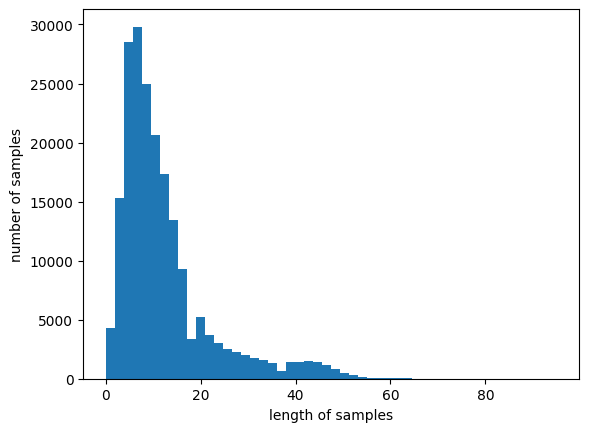

In [16]:
# 불용어
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','으로','자','에','와','한','하다']

# 형태소 분석기 OKT 사용하는 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(data['document']):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]  # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

# 리뷰 길이 분포
print('리뷰 최대 길이: ', max(len(review) for review in tokenized_data))
print('리뷰 평균 길이: ', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
# 영화 리뷰 데이터 학습

from gensim.models import Word2Vec

model = Word2Vec(sentences= tokenized_data, vector_size=100, window = 5, min_count = 5, sg = 0)

# 모델 저장
model.save('Data/230620/w2v.model')

# 임베딩 매트릭스 크기 확인
print(model.wv.vectors.shape)

# 최민식과 유사한 단어
print(model.wv.most_similar('최민식'))
print(model.wv.most_similar('히어로'))

(17614, 100)
[('한석규', 0.8473919034004211), ('안성기', 0.8259646892547607), ('박중훈', 0.8153495788574219), ('이정재', 0.8141316175460815), ('유다인', 0.8117566704750061), ('최민수', 0.8114067316055298), ('송강호', 0.8109113574028015), ('김수현', 0.8045221567153931), ('설경구', 0.8042004108428955), ('이주승', 0.8017957806587219)]
[('슬래셔', 0.8401452898979187), ('sf', 0.8372343182563782), ('호러', 0.8316418528556824), ('무협', 0.8237218856811523), ('하이', 0.8194390535354614), ('틴', 0.8178562521934509), ('물의', 0.8058147430419922), ('무비', 0.8000170588493347), ('SF', 0.7953506708145142), ('블랙', 0.7861042022705078)]
